<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Historical_Candlestick_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade mplfinance
!pip install --upgrade pandas_ta
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=cbb841f312d78288630bf868cdf65436aaf6194b91c2a460f333449870360d09
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta
import yfinance as yf

In [3]:
mu = 0.05
sigma = 0.02
S0 = 100
days = 200

In [4]:
ticker_name = "NIFTYBEES.NS"

In [5]:
def historical_price(ticker_name):
    ticker = yf.Ticker(ticker_name)

    history_df = ticker.history(period = "1y", interval = '1d')

    return history_df

In [6]:
def keltner_channel_plot(candlestick_df):
     indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.kc(high = 'High', low = 'Low', close = 'Close', length = 20)
     ], axis = 1)

     plots = [
         mpf.make_addplot(indicator_df['KCUe_20_2'], color='red', linestyle = '--'),
         mpf.make_addplot(indicator_df['KCLe_20_2'], color='green', linestyle = '--'),
         mpf.make_addplot(indicator_df['KCBe_20_2'], color='blue', linestyle = '--')
     ]

     return plots

In [7]:
def vwap_plot(candlestick_df):
     indicator_df  = pd.DataFrame({
         'High' : candlestick_df['High'],
         'Low' : candlestick_df['Low'],
         'Close' : candlestick_df['Close'],
         'Volume' : candlestick_df['Volume']
     })

     indicator_df.eval('Price = (High + Low + Close)/3', inplace = True)
     indicator_df.eval('Price_x_Volume = Price * Volume', inplace = True)
     indicator_df['cum_Price_x_Volume'] =  np.cumsum(indicator_df['Price_x_Volume'])
     indicator_df['cum_Volume'] =  np.cumsum(indicator_df['Volume'])
     indicator_df.eval('VWAP = cum_Price_x_Volume / cum_Volume', inplace = True)

     plots = [
         mpf.make_addplot(indicator_df["VWAP"], color="black", label = 'VWAP')
     ]

     return plots

In [8]:
def triple_ema_plot(candlestick_df):
     indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.ema(close = "Close", length=20),
         candlestick_df.ta.ema(close = "Close", length=50),
         candlestick_df.ta.ema(close = "Close", length=200)
     ], axis = 1)

     plots = [
         mpf.make_addplot(indicator_df["EMA_20"], color="green", label = 'EMA 20'),
         mpf.make_addplot(indicator_df["EMA_50"], color="blue", label = 'EMA 50'),
         mpf.make_addplot(indicator_df["EMA_200"], color="red", label = 'EMA 200')
     ]

     return plots

In [9]:
def supertrend_plot(candlestick_df):
     indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.supertrend(high = "High", low = "Low", close = "Close", length=10, multiplier=3)
     ], axis = 1)

     plots = [
         mpf.make_addplot(indicator_df["SUPERTl_10_3.0"], color="green"),
         mpf.make_addplot(indicator_df["SUPERTs_10_3.0"], color="red"),
     ]

     return plots

In [10]:
def adx_plot(candlestick_df, panel):
    indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.adx(high='High', low='Low', close='Close', length=14)
    ], axis = 1)

    plots = [
        mpf.make_addplot(indicator_df['ADX_14'], panel=panel, color='orange', ylabel='ADX'),
        mpf.make_addplot(indicator_df['DMP_14'], panel=panel, color='green', label='+DI'),
        mpf.make_addplot(indicator_df['DMN_14'], panel=panel, color='red', label='-DI')
    ]

    return plots

In [11]:
def macd_plot(candlestick_df, panel):
    indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.macd(close="Close", fast=12, slow=26, signal=9)
    ], axis = 1)

    plots = [
        mpf.make_addplot(indicator_df["MACD_12_26_9"], panel=panel, color="blue", ylabel="MACD", label = 'MACD'),
        mpf.make_addplot(indicator_df["MACDs_12_26_9"], panel=panel, color="orange", label = 'Signal'),
        mpf.make_addplot(
            indicator_df["MACDh_12_26_9"],
            type="bar",
            panel=panel,
            color=["green" if val >= 0 else "red" for val in indicator_df["MACDh_12_26_9"]],
            alpha=0.5,
        ),
    ]


    return plots

In [12]:
def rsi_plot(candlestick_df, panel):
    indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.rsi(close="Close", length=14)
    ], axis = 1)

    plots = [
         mpf.make_addplot(indicator_df["RSI_14"], panel = panel, color="purple", ylabel="RSI")
    ]

    return plots

In [13]:
def obv_plot(candlestick_df, panel):
    indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.obv(close="Close", volume="Volume")
    ], axis = 1)

    plots = [
         mpf.make_addplot(indicator_df['OBV'], panel = panel, color='blue', label='OBV')
    ]

    return plots

In [14]:
def plot_historical_candle_sticks(ticker_name):
    candlestick_df = historical_price(ticker_name)

    plots = (
        vwap_plot(candlestick_df) +
        keltner_channel_plot(candlestick_df) +
        macd_plot(candlestick_df, panel = 2) +
        rsi_plot(candlestick_df, panel = 3)
    )

    mpf.plot(
        candlestick_df,
        type="candle",  # Candlestick chart
        style="yahoo",  # Chart style
        addplot=plots,
        figscale = 8,
        volume = True,
        panel_ratios=(3, 1, 1, 1)
    )

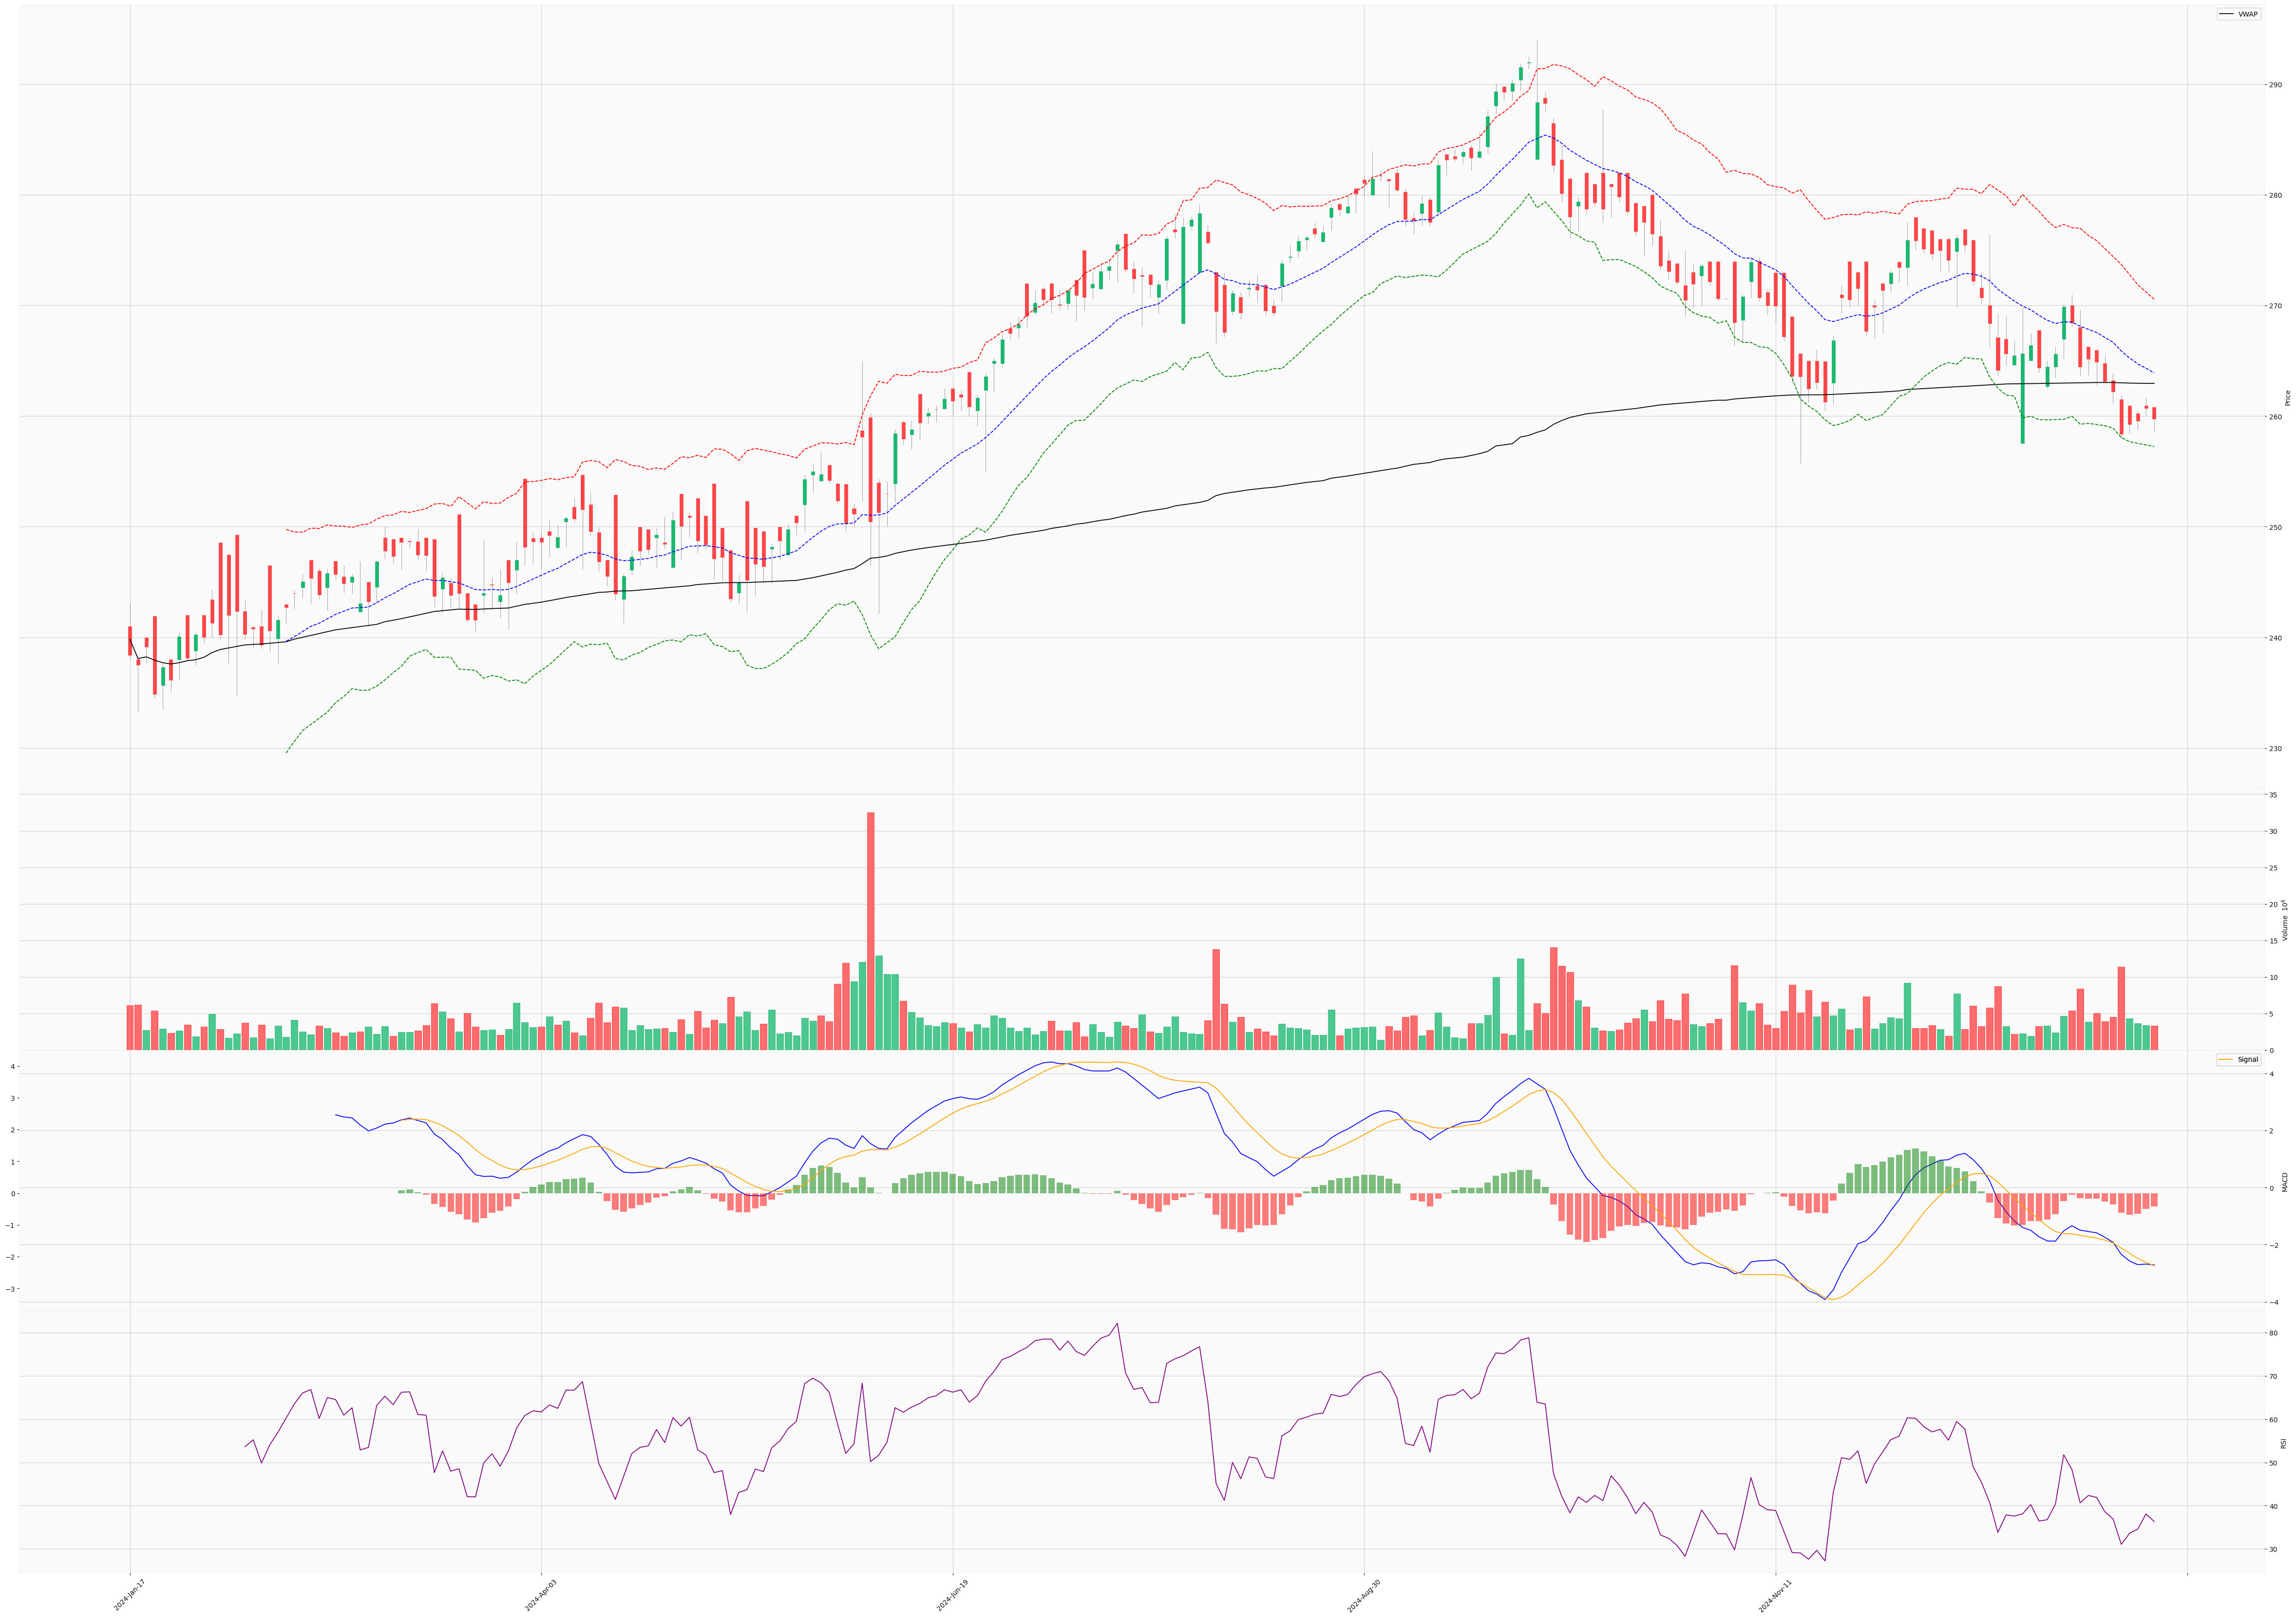

In [15]:
plot_historical_candle_sticks(ticker_name)